# Semantic Factors
This notebook aims for an exploratory factor analysis of "The Glasgow Norm" -- a database with 5.553 English words classified into nine psycholinguistics dimensions. The objetive in doing such an analysis is to find out empirical support for the theoretical segmentation of the semantic content, which are believed to have an objective portion and a subjective portion.

## Introduction

### Libraries

In [1]:
## Data analysis packages:
import pandas as pd
import numpy as np
from math import isnan  #Verifies if a given valu e is numerical.

In [2]:
## Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Plotly Express
import plotly.graph_objs as go
import plotly

### Definitions

In [4]:
## Forcing Pandas to display any number of elements
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
pd.options.display.max_seq_items = 15000

## DataPrep

### Importing "The Glasgow Norms" dataset
Available at https://doi.org/10.3758/s13428-018-1099-3.  
The Glasgow Norms are a set of normative ratings for 5,553 English words on nine psycholinguistic dimensions: arousal, valence, dominance, concreteness, imageability, familiarity, age of acquisition, semantic size, and gender association.

In [6]:
## Reading the dataset file:
## -> header=[0,1] parameters indicates that rows [0,1] must be considered as dataset header.
glasgow = pd.read_csv('../data/(Glasgow Norms Ratings - Sup Material) 13428_2018_1099_MOESM2_ESM.csv',
                     header=[0,1])

In [7]:
glasgow.head(2)

,Words,Length,AROU,Unnamed: 3_level_0,Unnamed: 4_level_0,VAL,Unnamed: 6_level_0,Unnamed: 7_level_0,DOM,Unnamed: 9_level_0,Unnamed: 10_level_0,CNC,Unnamed: 12_level_0,Unnamed: 13_level_0,IMAG,Unnamed: 15_level_0,Unnamed: 16_level_0,FAM,Unnamed: 18_level_0,Unnamed: 19_level_0,AOA,Unnamed: 21_level_0,Unnamed: 22_level_0,SIZE,Unnamed: 24_level_0,Unnamed: 25_level_0,GEND,Unnamed: 27_level_0,Unnamed: 28_level_0
,Unnamed: 0_level_1,Unnamed: 1_level_1,M,SD,N,M,SD,N,M,SD,N,M,SD,N,M,SD,N,M,SD,N,M,SD,N,M,SD,N,M,SD,N
0,abattoir,8,4.200,2.400,25,2.864,1.740,22,4.333,1.285,21,5.455,1.900,22,4.391,2.121,23,2.382,1.799,34,6.760,0.427,25,4.652,1.549,23,5.391,1.170,23
1,abbey,5,3.125,2.342,32,5.781,1.268,32,4.667,1.551,33,5.906,1.508,32,5.344,1.881,32,3.324,1.810,34,5.177,1.339,34,5.121,1.629,33,3.303,1.193,33


#### DataPrep: adjusting the column/feature label

In [9]:
## Reading the dataset file, but now discarding the first header row:
glasgow = pd.read_csv('../data/(Glasgow Norms Ratings - Sup Material) 13428_2018_1099_MOESM2_ESM.csv',
                     header=[1])

In [10]:
glasgow.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'M', 'SD', 'N', 'M.1', 'SD.1', 'N.1', 'M.2',
       'SD.2', 'N.2', 'M.3', 'SD.3', 'N.3', 'M.4', 'SD.4', 'N.4', 'M.5',
       'SD.5', 'N.5', 'M.6', 'SD.6', 'N.6', 'M.7', 'SD.7', 'N.7', 'M.8',
       'SD.8', 'N.8'],
      dtype='object')

In [11]:
glasgow.columns = ['words', 'length', 
                   'AROU_M', 'AROU_SD', 'AROU_N',
                   'VAL_M', 'VAL_SD', 'VAL_N',
                   'DOM_M', 'DOM_SD', 'DOM_N',
                   'CNC_M', 'CNC_SD', 'CNC_N',
                   'IMAG_M', 'IMAG_SD', 'IMAG_N',
                   'FAM_M', 'FAM_SD', 'FAM_N',
                   'AOA_M', 'AOA_SD', 'AOA_N',
                   'SIZE_M', 'SIZE_SD', 'SIZE_N',
                   'GEND_M', 'GEND_SD', 'GEND_N']

In [12]:
glasgow.head()

,words,length,AROU_M,AROU_SD,AROU_N,VAL_M,VAL_SD,VAL_N,DOM_M,DOM_SD,DOM_N,CNC_M,CNC_SD,CNC_N,IMAG_M,IMAG_SD,IMAG_N,FAM_M,FAM_SD,FAM_N,AOA_M,AOA_SD,AOA_N,SIZE_M,SIZE_SD,SIZE_N,GEND_M,GEND_SD,GEND_N
0,abattoir,8,4.200,2.400,25,2.864,1.740,22,4.333,1.285,21,5.455,1.900,22,4.391,2.121,23,2.382,1.799,34,6.760,0.427,25,4.652,1.549,23,5.391,1.170,23
1,abbey,5,3.125,2.342,32,5.781,1.268,32,4.667,1.551,33,5.906,1.508,32,5.344,1.881,32,3.324,1.810,34,5.177,1.339,34,5.121,1.629,33,3.303,1.193,33
2,abbreviate,10,3.273,1.582,33,5.250,1.031,32,5.235,1.238,34,3.286,1.733,35,3.177,1.689,34,5.121,1.838,33,5.543,1.130,35,2.667,1.700,33,3.971,0.954,34
3,abdicate,8,4.194,1.941,31,3.767,1.383,30,4.419,2.182,31,3.367,1.853,30,2.516,1.521,31,3.971,2.077,35,6.233,0.844,30,4.679,1.441,28,5.167,1.186,30
4,abdication,10,3.846,2.282,26,3.880,1.608,25,4.800,1.960,25,3.292,1.620,24,2.571,1.294,28,3.097,2.022,31,6.407,0.913,27,5.083,1.351,24,4.571,1.015,28


In [13]:
## Exportando o dataframe ajustado para um arquivo CSV:
#glasgow.to_csv('./dataset_GlasgowR/GlasgowR_pandas_ready.csv')

In [14]:
glasgow

,words,length,AROU_M,AROU_SD,AROU_N,VAL_M,VAL_SD,VAL_N,DOM_M,DOM_SD,DOM_N,CNC_M,CNC_SD,CNC_N,IMAG_M,IMAG_SD,IMAG_N,FAM_M,FAM_SD,FAM_N,AOA_M,AOA_SD,AOA_N,SIZE_M,SIZE_SD,SIZE_N,GEND_M,GEND_SD,GEND_N
0,abattoir,8,4.200,2.400,25,2.864,1.740,22,4.333,1.285,21,5.455,1.900,22,4.391,2.121,23,2.382,1.799,34,6.760,0.427,25,4.652,1.549,23,5.391,1.170,23
1,abbey,5,3.125,2.342,32,5.781,1.268,32,4.667,1.551,33,5.906,1.508,32,5.344,1.881,32,3.324,1.810,34,5.177,1.339,34,5.121,1.629,33,3.303,1.193,33
2,abbreviate,10,3.273,1.582,33,5.250,1.031,32,5.235,1.238,34,3.286,1.733,35,3.177,1.689,34,5.121,1.838,33,5.543,1.130,35,2.667,1.700,33,3.971,0.954,34
3,abdicate,8,4.194,1.941,31,3.767,1.383,30,4.419,2.182,31,3.367,1.853,30,2.516,1.521,31,3.971,2.077,35,6.233,0.844,30,4.679,1.441,28,5.167,1.186,30
4,abdication,10,3.846,2.282,26,3.880,1.608,25,4.800,1.960,25,3.292,1.620,24,2.571,1.294,28,3.097,2.022,31,6.407,0.913,27,5.083,1.351,24,4.571,1.015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5548,zeppelin,8,6.185,2.037,27,5.000,1.414,27,5.333,1.743,27,6.286,0.920,28,6.185,1.123,27,3.167,2.115,30,6.036,0.944,28,5.464,1.721,28,5.269,1.021,26
5549,zero,4,4.031,2.023,32,4.182,1.585,33,4.567,2.124,30,2.688,1.895,32,3.903,2.347,31,6.269,1.195,26,2.636,1.123,33,1.758,1.393,33,4.172,0.647,29
5550,zest,4,5.969,2.158,32,6.818,1.313,33,6.121,1.320,33,4.438,1.694,32,4.033,1.622,30,4.000,1.626,31,5.364,1.123,33,2.636,1.738,33,3.452,1.011,31
5551,zoo,3,5.909,2.137,33,6.235,1.800,34,5.485,1.598,33,6.118,1.105,34,6.441,1.006,34,5.655,1.747,29,2.324,0.674,34,4.844,1.873,32,4.059,0.802,34


### Setting the columns "words" as dataframe index:

In [15]:
glasgow.set_index('words', inplace=True)

----
### Segmenting the database into variables of interest

In [16]:
import re

In [17]:
## Listing only columns related to _M (mean) and _SD (standard deviation)
interest = ['AROU_M', 'AROU_SD',
                   'VAL_M', 'VAL_SD',
                   'DOM_M', 'DOM_SD',
                   'CNC_M', 'CNC_SD',
                   'IMAG_M', 'IMAG_SD',
                   'FAM_M', 'FAM_SD',
                   'AOA_M', 'AOA_SD',
                   'SIZE_M', 'SIZE_SD',
                   'GEND_M', 'GEND_SD']

### Selecting only columns related to _M (mean)

In [94]:
tmp_pattern_M = re.compile(r'.*_M$')
tmp_M_parameters = list(filter(tmp_pattern_M.match, interest))

print(tmp_M_parameters)

['AROU_M', 'VAL_M', 'DOM_M', 'CNC_M', 'IMAG_M', 'FAM_M', 'AOA_M', 'SIZE_M', 'GEND_M']


In [95]:
df_M = glasgow[tmp_M_parameters]
df_M

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M
words,,,,,,,,,
abattoir,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391
abbey,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303
abbreviate,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971
abdicate,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167
abdication,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571
...,...,...,...,...,...,...,...,...,...
zeppelin,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269
zero,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172
zest,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452


----
### Selecting only columns related to _SD (standard deviation)

In [96]:
tmp_pattern_SD = re.compile(r'.*_SD$')
tmp_SD_parameters = list(filter(tmp_pattern_SD.match, interest))

print(tmp_SD_parameters)

['AROU_SD', 'VAL_SD', 'DOM_SD', 'CNC_SD', 'IMAG_SD', 'FAM_SD', 'AOA_SD', 'SIZE_SD', 'GEND_SD']


In [104]:
## Selecting a dataframe with SD values:
df_SD = glasgow[tmp_SD_parameters]
df_SD

,AROU_SD,VAL_SD,DOM_SD,CNC_SD,IMAG_SD,FAM_SD,AOA_SD,SIZE_SD,GEND_SD
words,,,,,,,,,
abattoir,2.400,1.740,1.285,1.900,2.121,1.799,0.427,1.549,1.170
abbey,2.342,1.268,1.551,1.508,1.881,1.810,1.339,1.629,1.193
abbreviate,1.582,1.031,1.238,1.733,1.689,1.838,1.130,1.700,0.954
abdicate,1.941,1.383,2.182,1.853,1.521,2.077,0.844,1.441,1.186
abdication,2.282,1.608,1.960,1.620,1.294,2.022,0.913,1.351,1.015
...,...,...,...,...,...,...,...,...,...
zeppelin,2.037,1.414,1.743,0.920,1.123,2.115,0.944,1.721,1.021
zero,2.023,1.585,2.124,1.895,2.347,1.195,1.123,1.393,0.647
zest,2.158,1.313,1.320,1.694,1.622,1.626,1.123,1.738,1.011


----
### Creating a dataframe with calculated variance (VAR)

In [105]:
## Creating a dataframe with variance values (variance = SD^2)
df_VAR = df_SD**2

In [106]:
## Using regular expression to replace the suffix in column names:
tmp_VAR_columns = [re.sub(r'_SD$', '_VAR', item) for item in list(df_VAR.columns)]
df_VAR.columns = tmp_VAR_columns
df_VAR

,AROU_VAR,VAL_VAR,DOM_VAR,CNC_VAR,IMAG_VAR,FAM_VAR,AOA_VAR,SIZE_VAR,GEND_VAR
words,,,,,,,,,
abattoir,5.760000,3.027600,1.651225,3.610000,4.498641,3.236401,0.182329,2.399401,1.368900
abbey,5.484964,1.607824,2.405601,2.274064,3.538161,3.276100,1.792921,2.653641,1.423249
abbreviate,2.502724,1.062961,1.532644,3.003289,2.852721,3.378244,1.276900,2.890000,0.910116
abdicate,3.767481,1.912689,4.761124,3.433609,2.313441,4.313929,0.712336,2.076481,1.406596
abdication,5.207524,2.585664,3.841600,2.624400,1.674436,4.088484,0.833569,1.825201,1.030225
...,...,...,...,...,...,...,...,...,...
zeppelin,4.149369,1.999396,3.038049,0.846400,1.261129,4.473225,0.891136,2.961841,1.042441
zero,4.092529,2.512225,4.511376,3.591025,5.508409,1.428025,1.261129,1.940449,0.418609
zest,4.656964,1.723969,1.742400,2.869636,2.630884,2.643876,1.261129,3.020644,1.022121


----
### Preparing a dataframe with means and variance of the nine psycholinguistic variables

In [107]:
## Combining df_M and df_VAR dataframes, i.e., means and variance.
df_M_VAR = pd.concat([df_M, df_VAR], axis=1)
df_M_VAR

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M,AROU_VAR,VAL_VAR,DOM_VAR,CNC_VAR,IMAG_VAR,FAM_VAR,AOA_VAR,SIZE_VAR,GEND_VAR
words,,,,,,,,,,,,,,,,,,
abattoir,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,5.760000,3.027600,1.651225,3.610000,4.498641,3.236401,0.182329,2.399401,1.368900
abbey,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,5.484964,1.607824,2.405601,2.274064,3.538161,3.276100,1.792921,2.653641,1.423249
abbreviate,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,2.502724,1.062961,1.532644,3.003289,2.852721,3.378244,1.276900,2.890000,0.910116
abdicate,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,3.767481,1.912689,4.761124,3.433609,2.313441,4.313929,0.712336,2.076481,1.406596
abdication,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,5.207524,2.585664,3.841600,2.624400,1.674436,4.088484,0.833569,1.825201,1.030225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeppelin,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,4.149369,1.999396,3.038049,0.846400,1.261129,4.473225,0.891136,2.961841,1.042441
zero,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,4.092529,2.512225,4.511376,3.591025,5.508409,1.428025,1.261129,1.940449,0.418609
zest,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,4.656964,1.723969,1.742400,2.869636,2.630884,2.643876,1.261129,3.020644,1.022121


### Preparing a full dataframe with Mean, SD and VAR information

In [108]:
## Combining mean, standard deviation, and variance:
df = pd.concat([df_M, df_SD, df_VAR], axis=1)
df

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M,AROU_SD,VAL_SD,DOM_SD,CNC_SD,IMAG_SD,FAM_SD,AOA_SD,SIZE_SD,GEND_SD,AROU_VAR,VAL_VAR,DOM_VAR,CNC_VAR,IMAG_VAR,FAM_VAR,AOA_VAR,SIZE_VAR,GEND_VAR
words,,,,,,,,,,,,,,,,,,,,,,,,,,,
abattoir,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,2.400,1.740,1.285,1.900,2.121,1.799,0.427,1.549,1.170,5.760000,3.027600,1.651225,3.610000,4.498641,3.236401,0.182329,2.399401,1.368900
abbey,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,2.342,1.268,1.551,1.508,1.881,1.810,1.339,1.629,1.193,5.484964,1.607824,2.405601,2.274064,3.538161,3.276100,1.792921,2.653641,1.423249
abbreviate,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,1.582,1.031,1.238,1.733,1.689,1.838,1.130,1.700,0.954,2.502724,1.062961,1.532644,3.003289,2.852721,3.378244,1.276900,2.890000,0.910116
abdicate,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,1.941,1.383,2.182,1.853,1.521,2.077,0.844,1.441,1.186,3.767481,1.912689,4.761124,3.433609,2.313441,4.313929,0.712336,2.076481,1.406596
abdication,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,2.282,1.608,1.960,1.620,1.294,2.022,0.913,1.351,1.015,5.207524,2.585664,3.841600,2.624400,1.674436,4.088484,0.833569,1.825201,1.030225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeppelin,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,2.037,1.414,1.743,0.920,1.123,2.115,0.944,1.721,1.021,4.149369,1.999396,3.038049,0.846400,1.261129,4.473225,0.891136,2.961841,1.042441
zero,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,2.023,1.585,2.124,1.895,2.347,1.195,1.123,1.393,0.647,4.092529,2.512225,4.511376,3.591025,5.508409,1.428025,1.261129,1.940449,0.418609
zest,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,2.158,1.313,1.320,1.694,1.622,1.626,1.123,1.738,1.011,4.656964,1.723969,1.742400,2.869636,2.630884,2.643876,1.261129,3.020644,1.022121


----
## Correlation Analysis of the mean of psycholinguistics dimensions

<AxesSubplot: >

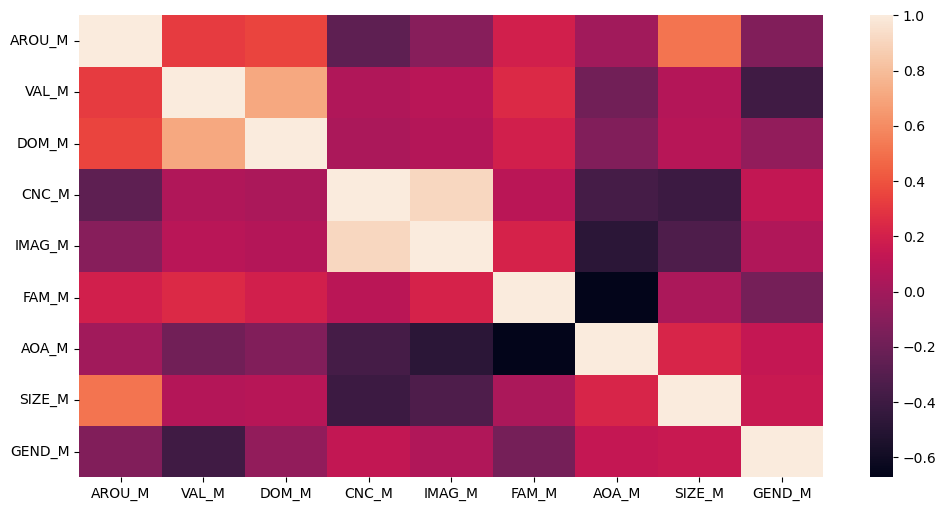

In [112]:
## Plotting the correlation map only for Mean values
plt.figure(figsize=(12,6))
c= df_M.corr()
sns.heatmap(c)

-----
### Visualizing features with confidence interval:

In [113]:
import plotly.graph_objects as go
import plotly.colors as pc

import cufflinks as cf


def viz_GlasgowR(words=['dog', 'cat'], dataframe=None):
    '''Visualiza as features psicolínguisticas de uma lista de palavras a partir 
    dos parâmetros dispostos no The Glasgow Norm, já carregados no dataframe "words". 
    Sintaxe: viz_GlasgowR(words, dataframe), onde:
        words = lista de strings contidas no dicionário/base Glasgow Rate.
        dataframe = DataFrame contendo os dados.
        
    Updated: 2023.08.26 - Adding alpha channel to plot standard deviation.
    '''
    if dataframe is None:
        raise ValueError("You need to provide a DataFrame containing the data.")

    ## Eixo-x, numérico:
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    ## Rótulo do eixo-x:
    xticks = ['AROU', 'VAL', 'DOM', 'CNC', 'IMAG', 'FAM', 'AOA', 'SIZE', 'GEND']
    ## Labels a serem buscados no dicionário Glasgow:
    label_M = ['AROU_M', 'VAL_M', 'DOM_M', 'CNC_M', 'IMAG_M', 'FAM_M', 'AOA_M', 'SIZE_M', 'GEND_M']
    label_SD = ['AROU_SD', 'VAL_SD', 'DOM_SD', 'CNC_SD', 'IMAG_SD', 'FAM_SD', 'AOA_SD', 'SIZE_SD', 'GEND_M']
    
    # Generate a list of unique colors using Plotly's color scales
    num_colors = len(words)
    colors = pc.qualitative.Plotly[:num_colors]
    
    fig = go.Figure()

    for word, color in zip(words, colors):
        if word in dataframe.index:
            feat_M = list(dataframe.loc[word][label_M])
            feat_SD = list(dataframe.loc[word][label_SD])
            y_upper = [a + b for a, b in zip(feat_M, feat_SD)]
            y_lower = [a - b for a, b in zip(feat_M, feat_SD)]

            fig.add_trace(go.Scatter(
                x=x,
                y=feat_M,
                line=dict(color=color),  # Assign a unique color to each word
                mode='lines',
                name=word,
                showlegend=True
            ))

            fig.add_trace(go.Scatter(
                x=x + x[::-1],  # x, then x reversed
                y=y_upper + y_lower[::-1],  # upper, then lower reversed
                fill='toself',
                # fillcolor='rgba(0,100,80,0.2)',
                # HEX to RGBA (transparency)
                fillcolor=cf.colors.to_rgba(color,.2),
                line=dict(color='rgba(255,255,255,0)'),
                hoverinfo="skip",
                showlegend=False
            ))
        
    ## Atualizando o xtick label a partir do nome das colunas:
    fig.update_layout(
        xaxis=dict(
            tickmode='array',
            tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9],
            ticktext=xticks
        )
    )
    
    return fig

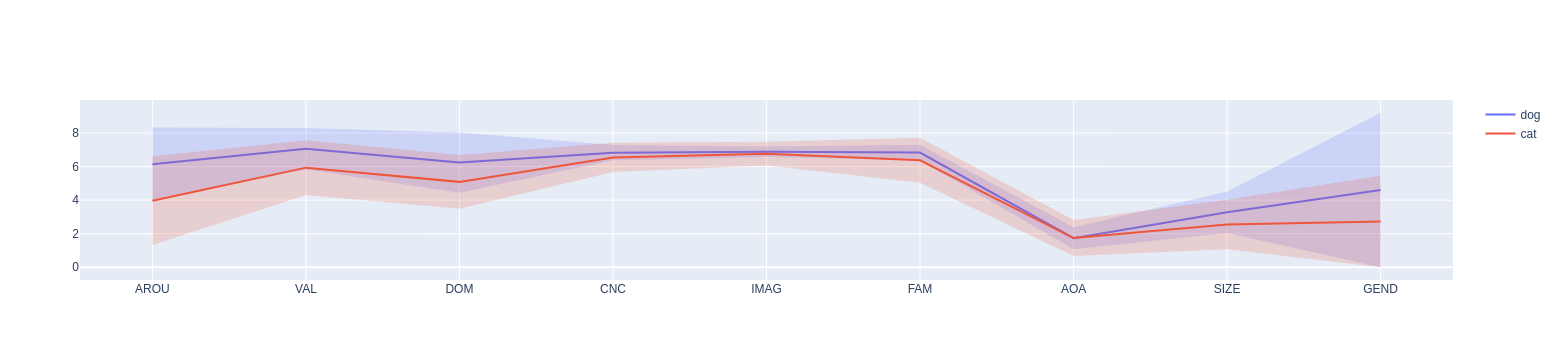

In [115]:
viz_GlasgowR(words=['dog', 'cat'], dataframe=df)

> Experimenting some words visualization:

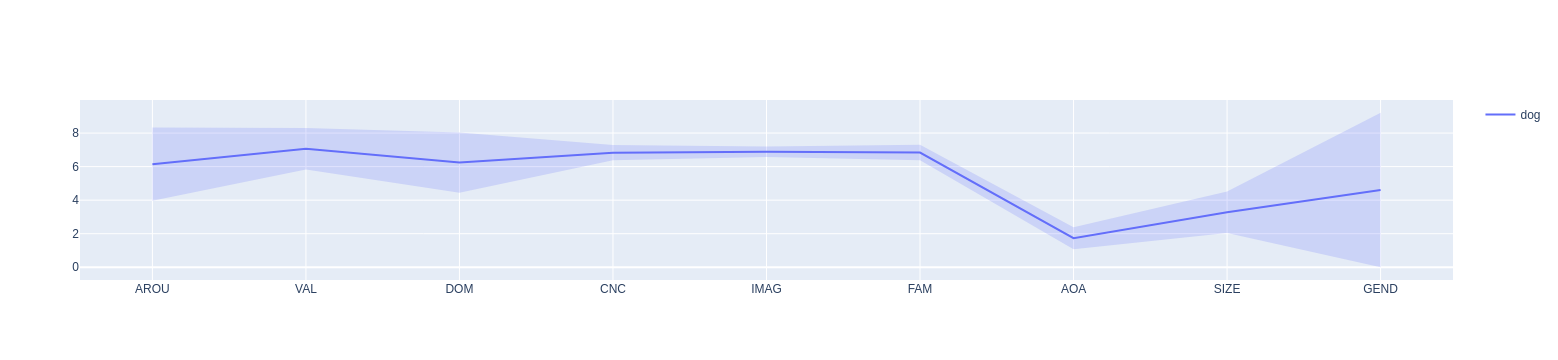

In [118]:
fig_dog = viz_GlasgowR(['dog'], df)
fig_dog

> EBNS suggested the words "snake" e "dog".  
> How does it compare to known symbols, i.e., words whose relationships are already known?

In [121]:
## Showing the interest attributes for the words SNAKE and DOG:
df.loc[['snake', 'dog'],interest]

,AROU_M,AROU_SD,VAL_M,VAL_SD,DOM_M,DOM_SD,CNC_M,CNC_SD,IMAG_M,IMAG_SD,FAM_M,FAM_SD,AOA_M,AOA_SD,SIZE_M,SIZE_SD,GEND_M,GEND_SD
words,,,,,,,,,,,,,,,,,,
snake,4.909,2.366,3.657,1.620,5.257,2.047,6.714,0.700,6.657,0.630,5.647,1.473,2.529,0.947,3.091,1.621,5.200,1.064
dog,6.147,2.185,7.067,1.237,6.242,1.793,6.833,0.453,6.889,0.314,6.840,0.463,1.735,0.656,3.273,1.238,4.606,0.983


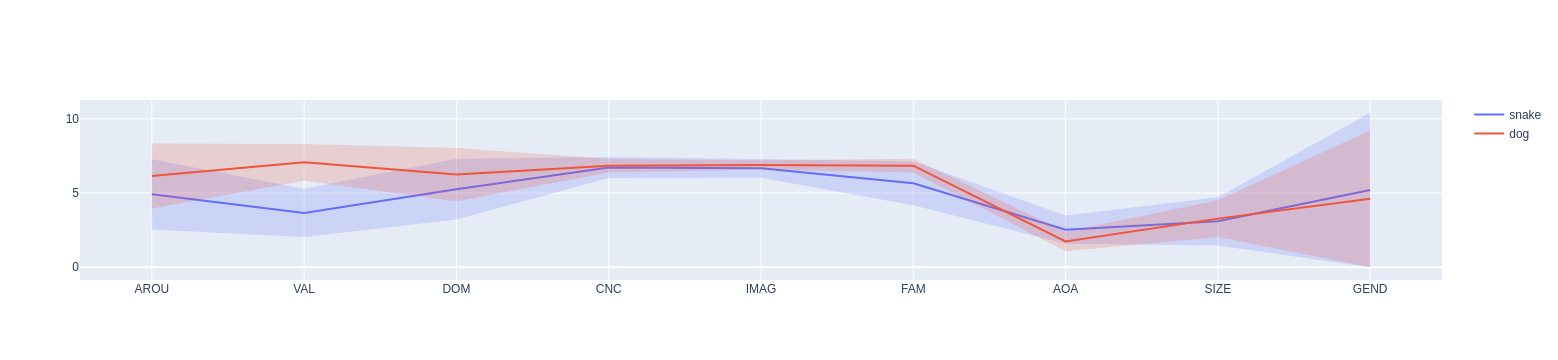

In [122]:
viz_GlasgowR(['snake','dog'], df)

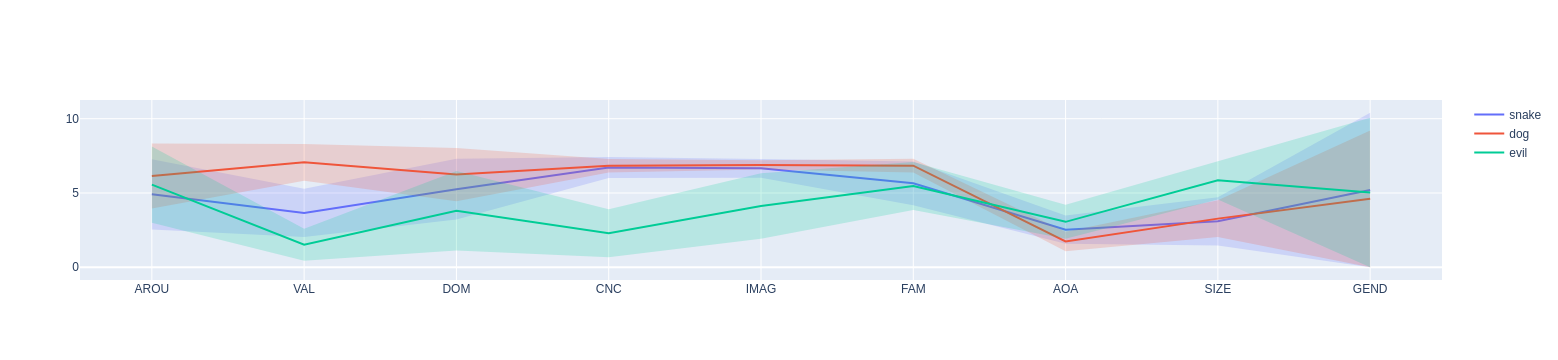

In [124]:
viz_GlasgowR(['snake','dog','evil'], df)

----
# Factor Analysis
Based on the https://towardsdatascience.com/factor-analysis-a-complete-tutorial-1b7621890e42.
> It is not a detailed tutorial.    

This tutorial brings more reference on factor analysis calculation: https://medium.com/@hongwy1128/intro-guide-to-factor-analysis-python-84dd0b0fd729

In [125]:
from factor_analyzer import FactorAnalyzer

In [128]:
## Selecting a subset of the original dataframe with only the columns of interest:
# x = glasgow[interest]

In [129]:
## Creating the estimator (Factor analyzer)
fa = FactorAnalyzer()
fa.fit(df_M_VAR)

FactorAnalyzer(rotation_kwargs={})

In [130]:
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev

array([3.92784384, 2.84816134, 2.10964093, 1.68467435, 1.03936101,
       0.93764992, 0.86865391, 0.77786002, 0.72176299, 0.67457213,
       0.54129513, 0.45781267, 0.39350535, 0.32176135, 0.28372546,
       0.18054323, 0.16747098, 0.06370539])

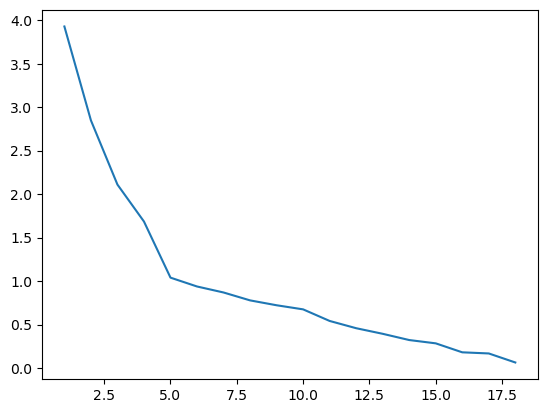

In [131]:
plt.plot(range(1,x.shape[1]+1),ev)

### Choosing two factors and analyzing their structure:

> Choosing 2 factors (> than 2).
>> Although I would like to have just 2 -> objective and subjective.

In [143]:
fa = FactorAnalyzer(2, rotation='varimax')
fa.fit(df_M_VAR)
loads = fa.loadings_
print(loads)

[[ 3.99905088e-01  4.18332233e-01]
 [-2.12325844e-02  5.43898573e-01]
 [ 1.73425159e-02  4.61733650e-01]
 [-8.55699122e-01 -1.94911623e-02]
 [-7.81979943e-01  1.23029294e-01]
 [-1.49188514e-01  7.74084648e-01]
 [ 4.65936886e-01 -5.78907766e-01]
 [ 5.72774683e-01  1.48977395e-01]
 [-1.05214166e-02 -2.83685524e-01]
 [ 1.42075527e-01 -1.50266501e-01]
 [ 2.29292758e-01 -1.60488990e-03]
 [ 3.80346533e-01  3.48026725e-04]
 [ 6.32691284e-01 -3.27708515e-02]
 [ 7.12392256e-01 -1.92644455e-01]
 [ 3.36432553e-02 -7.53611650e-01]
 [ 4.94553251e-02 -2.75675024e-01]
 [-4.11833656e-02 -1.22377342e-01]
 [ 2.20154181e-01 -1.28581200e-02]]


### Analyzing the factor structure:

In [144]:
def highlight_high_values(val):
    ''' Highlights values higher or lower than 0.5. Must be applied as a map in a Pandas.DataFrame style.
    '''
    color = 'background-color: yellow' if ((val > 0.5) or (val < -0.5)) else ''
    return color

In [145]:
## Creating a dataframe with the loading values and column names:
factors = pd.DataFrame(fa.loadings_, columns=['Factor 1','Factor 2'], index=[df_M_VAR.columns])

In [146]:
factors.style.applymap(highlight_high_values)

,Factor 1,Factor 2
AROU_M,0.399905,0.418332
VAL_M,-0.021233,0.543899
DOM_M,0.017343,0.461734
CNC_M,-0.855699,-0.019491
IMAG_M,-0.781980,0.123029
FAM_M,-0.149189,0.774085
AOA_M,0.465937,-0.578908
SIZE_M,0.572775,0.148977
GEND_M,-0.010521,-0.283686
AROU_VAR,0.142076,-0.150267


----
### Discussion regarding Factor Analysis:
- As expected to, it seems **Factor 1** may relate to subjectivity:  
> It is negative related to concreteness, i.e., it relates to abstracteness.  
> The same happens to imageability, i.e., how ones can easily imagine or picture the concept.  
>> Variance of both attributes relates to this factor. It may indicate there's no consense on the concreteness and imageability of such terms. Theoretically, it sustains the subjectivity aspect.

## Evaluating the factors through Cronbach alpha measurement:

In [147]:
import pingouin as pg

In [148]:
#Create the factors
factor1 = df[['CNC_M', 'IMAG_M', 'SIZE_M', 'CNC_VAR', 'IMAG_VAR']]
factor2 = df[['VAL_M', 'FAM_M', 'AOA_M', 'FAM_VAR']]

In [150]:
#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
print(factor1_alpha, factor2_alpha)

(-0.7055670184905233, array([-0.778, -0.636])) (-1.0011718762809991, array([-1.089, -0.917]))


Cronbach alpha was negative, which means this factor shouldn't be used.  
However, it would be a naive interpretation, since in fact such variables are theoretically sustained. If this factor were part of a test, it would be recommendable to change their structure. In this case, it seems affordable to keep them.  

More on this can be found at: https://stats.stackexchange.com/questions/220384/cfa-negative-factor-loadings